# “火炬上的深度学习"第一次大作业

在这个作业中，你需要半独立地利用人工神经网络搭建一个手写数字识别器

本文件是集智AI学园http://campus.swarma.org 出品的“火炬上的深度学习”第II课的配套源代码

In [38]:

"""简单的 LeNet-5类型的卷积神经网络模型，MNIST例子.
"""

#所有依赖包

import gzip
import os
import sys

import numpy as np
from six.moves import urllib
import torch
from torch.autograd import Variable
import torch.optim as optim

import matplotlib.pylab as plt

#定义一系列常数
SOURCE_URL = 'http://yann.lecun.com/exdb/mnist/' #图像数据如果没下载，可以从这个地址下载
WORK_DIRECTORY = 'data' #存储的路径名
IMAGE_SIZE = 28 #每张图片的大小尺寸
NUM_CHANNELS = 1  #每张图片的通道数
PIXEL_DEPTH = 255 #像素的深度0-255
NUM_LABELS = 10 #手写数字，一共十种

%matplotlib inline



# 读取MINST图形文件

In [39]:
#下载图像文件，如果文件已经存在，那么就不下载。
def maybe_download(filename):
    """Download the data from Yann's website, unless it's already here."""
    if not os.path.isdir(WORK_DIRECTORY):
        os.mkdir(WORK_DIRECTORY)
    filepath = os.path.join(WORK_DIRECTORY, filename)
    if not os.path.exists(filepath):
        filepath, _ = urllib.request.urlretrieve(SOURCE_URL + filename, filepath)
        size = os.path.getsize(filepath)
        print('Successfully downloaded', filename, size, 'bytes.')
    return filepath
# Get the data.
train_data_filename = maybe_download('train-images-idx3-ubyte.gz')
train_labels_filename = maybe_download('train-labels-idx1-ubyte.gz')
test_data_filename = maybe_download('t10k-images-idx3-ubyte.gz')
test_labels_filename = maybe_download('t10k-labels-idx1-ubyte.gz')

def extract_data(filename, num_images):
    # filename: 文件存放的路径，num_images: 读入的图片个数
    """将图像解压缩展开，读入成一个4维的张量： [image index（图像的编码）, y（纵坐标）, x（横坐标）, channels（通道）].
    我们将数组中的数值范围从原来的[0, 255]降低到了[-0.5, 0.5]范围内
    """
    print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images * NUM_CHANNELS)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = (data - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
        data = data.reshape(num_images, NUM_CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
        return data

def extract_labels(filename, num_images):
    """将label的数据文件解压缩，并将label读成64位的整数"""
    print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

# 将数据解压缩并存储到数组中，60000张图片，60000个label，测试集中有10000张图片
train_data = extract_data(train_data_filename, 60000)
train_X = train_data.reshape(len(train_data), -1)
train_labels = extract_labels(train_labels_filename, 60000)
train_Y = train_labels
test_data = extract_data(test_data_filename, 10000)
test_X = test_data.reshape(len(test_data), -1)

test_labels = extract_labels(test_labels_filename, 10000)
test_Y = test_labels
train_X.shape, train_Y.shape

# train_X, train_Y 中分别存储的是向量化的训练数据与标签
# test_X, test_Y 中分别存储的是向量化的测试数据与标签
# train_X的维度是60000个样本，784个分量的图像向量
# test_X的维度是10000个样本，784个分量的图像向量

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


((60000, 784), (60000,))

# 在这里写下你自己的代码

### 第一步：定义神经网络，提示，可以使用简单的torch.nn.SequentialModel

本文件是集智AI学园http://campus.swarma.org 出品的“火炬上的深度学习”第II课的配套源代码

In [ ]:
# 提示：需要考虑好网络有几层，每一层有多少个节点
#net = torch.nn.Sequential(
#    torch.nn.Linear(784, 10),
#    torch.nn.Sigmoid(),
#)

# 问题：如果要增加新的神经网络层怎么办？


### 第二步：构造损失函数和优化器

In [ ]:
#cost = torch.nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(net.parameters(), lr = 0.1)

### 第三步：开始训练循环

In [13]:
# 提示：有两重循环，最外面层是多少次的训练，里层为对数据批次（batch）的循环


# 神经网络训练循环
#batch_size = 128
#for i in range(1000):
    # 每128个样本点被划分为一个撮，在循环的时候一撮一撮地读取
#    batch_loss = []
    # start和end分别是提取一个batch数据的起始和终止下标
#    for start in range(0, len(train_X), batch_size):
#        end = start + batch_size if start + batch_size < len(train_X) else len(train_X)
#        xx = Variable(torch.FloatTensor(train_X[start:end])) #从训练数据train_X中提取数据
#        yy = Variable(torch.LongTensor(train_Y[start:end]))  #从训练数据train_Y中提取标签，注意标签数据为整数，因此相应的tensor也要为long
#        predict = neuc(xx) #用神经网络进行预测
#        loss = cost(predict, yy) #计算损失函数（交叉熵）
#        optimizer.zero_grad() #清空梯度
#        loss.back() #开始反向传播
#        optimizer.step_() #开始更新梯度
#        batch_loss.append(loss.data.numpy())
    
    # 每隔100步输出一下损失值（loss）
#    if i % 100==0:
#        print(i, np.mean(batch_loss))

0 1.3233
100 0.0671661
200 0.0359067
300 0.0221188
400 0.0147049
500 0.0104579
600 0.00785325
700 0.00616211
800 0.00499631
900 0.00416906


### 请在这里写下你自己的回答

In [35]:
# 请绘制上面训练过程的损失函数曲线，以及'''错误率曲线'''！！！

### 第四步：在测试集上测试模型

In [14]:
# 定义一个专门计算分类错误率的函数，它的基本思想是，对于预测向量predictions的每一行，
# 取最大的那个元素的下标，与标签labels中的元素做比较
#def error_rate(predictions, labels):
#    """计算预测错误率的函数，其中predictions是模型给出的一组预测结果，labels是数据之中的正确答案"""
#    predictions = np.argmax(predictions, 1)
#    return 100.0 - (
#      100.0 *
#      np.sum( predictions == labels) /
#      predictions.shape[0])

In [34]:
# 分多个batch计算测试结果
#errors = []
#losses = []
#i = 0
#for start in range(0, len(test_X), batch_size):
#    end1 = start + batch_size if start + batch_size < len(test_X) else len(test_X)
#    i += 1
#    x = Variable(torch.FloatTensor(test_X[start:end]))
#    y = Variable(torch.FloatTensor(test_Y[start:end]))
#    predictions = net(x)
#    loss = cost(predictions, y)
#    err_rate = error_rate(predictions.data.numpy(), y.data.numpy())
#    errors.append(err_rate)
#    losses.append(loss.data.numpy())
#    print(i, err_rate)

#print('平均错误率：%.4f%%'%np.mean(errors))

### 用单个图像进行测试

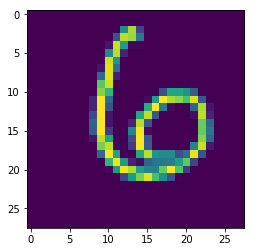

In [24]:
#随便从数据集中读入一张图片，并绘制出来
#idx = 100
#muteimg = test_data[idx, 0, :, :]
#plt.imshow(muteimg)

In [33]:
# 计算识别结果
#x = Variable(torch.FloatTensor(test_X[idx, :].reshape(1, -1)))
#predict = net(x)
#np.argmax(predict.data.numpy())

6

## 升级版

如果你已经运行跑通上面的所有代码，那么请你尝试对其进行更改，让测试集上面的识别错误率进一步下降，看看能不能到1%以下

提示：可以考虑增加层的深度

本文件是集智AI学园http://campus.swarma.org 出品的“火炬上的深度学习”第II课的配套源代码